# CASE STUDY : DECISION TREE

**Problem Statement**
------
Use decision trees to prepare a model on fraud data

## 1. Introduction:<a class="anchor" id="1"></a>
### What is a Decision Tree?
+ #### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
+ #### In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
+ #### The decisions or the test are performed on the basis of features of the given dataset.
+ #### It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
+ #### It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
+ #### In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
+ #### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

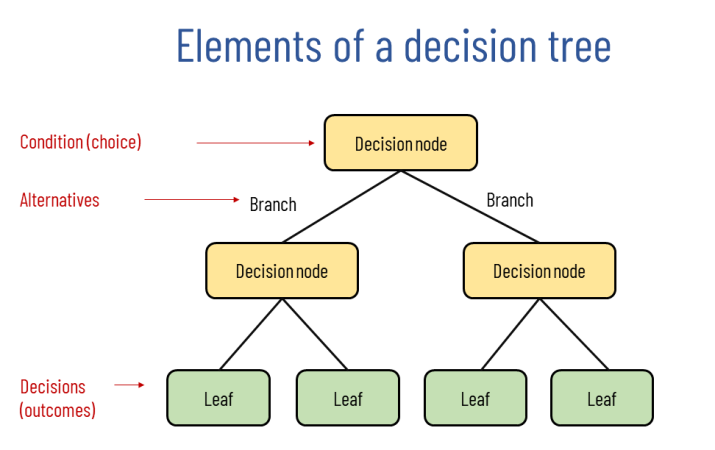

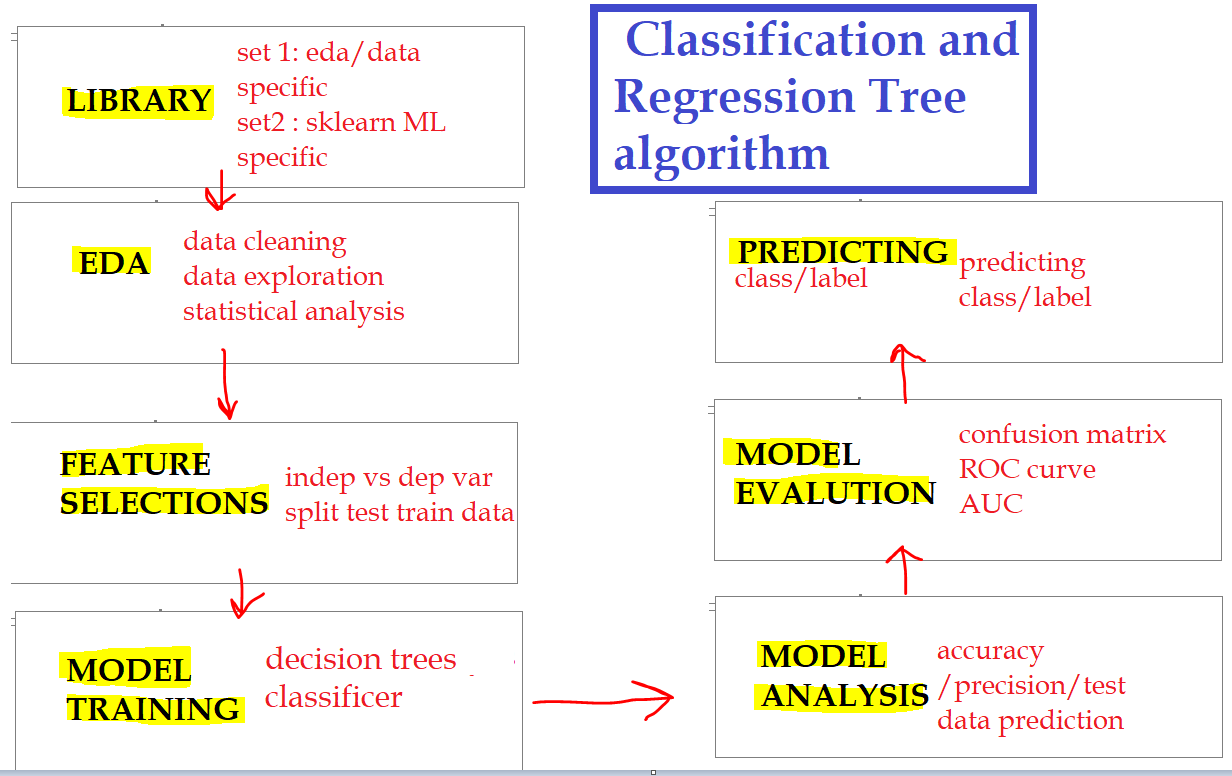

In [40]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

#SET2 : DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import  StratifiedKFold, train_test_split

#SET 3 : ML SPECIFIC
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

#SET 4 : ML EVALUATION SPECIFIC
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix


In [3]:
#SET 5 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
'''#SET 6 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving Fraud_check.csv to Fraud_check (1).csv


In [5]:
# Import Dataset
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


DATA DICTIONARY
-----

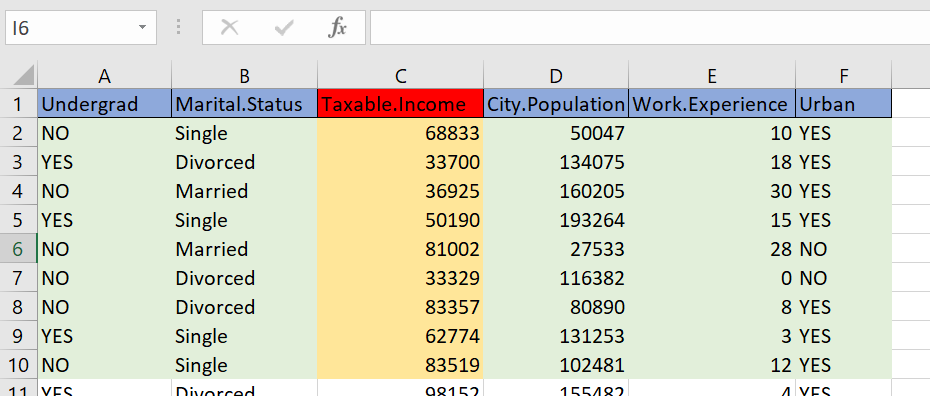


Data Description :

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not



DataSet analysis
----

- data size
- data type
- data shape

In [6]:
df.shape

(600, 6)

conclusion

- no of observations = 600
- no of features = 6

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


DATA CLEANING
----

- missing/null values
- duplicates


Missing Values

In [8]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [9]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

no missing data so all the entries are valid for use.


Duplicate Analysis

In [10]:
df[df.duplicated()].shape

(0, 6)

In [11]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [12]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


Feature Engineering
----

In [13]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [14]:
categorical_features = df.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [15]:
numerical_features = df.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

# Univariate analysis

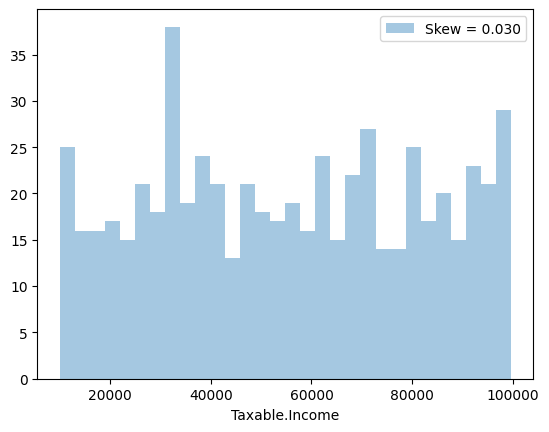

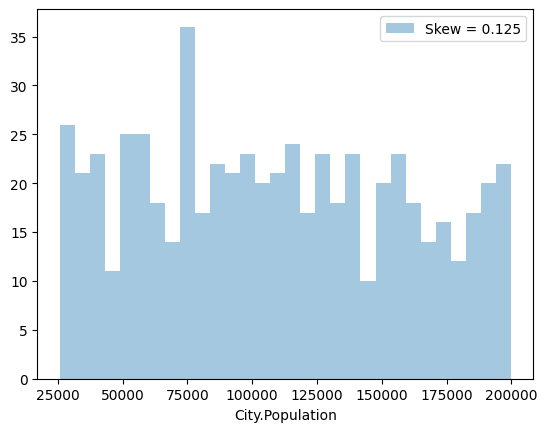

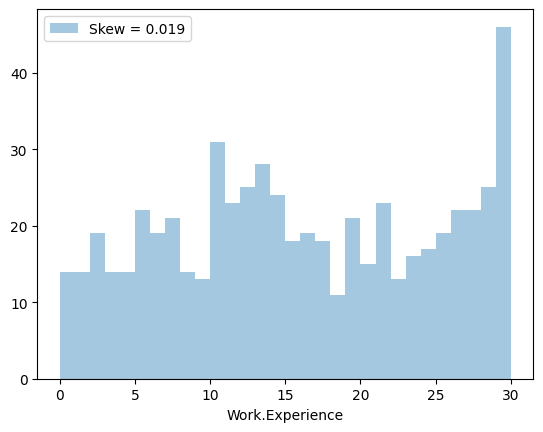

In [16]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Outlier Analysis
----

In [17]:
numerical_features

['Taxable.Income', 'City.Population', 'Work.Experience']

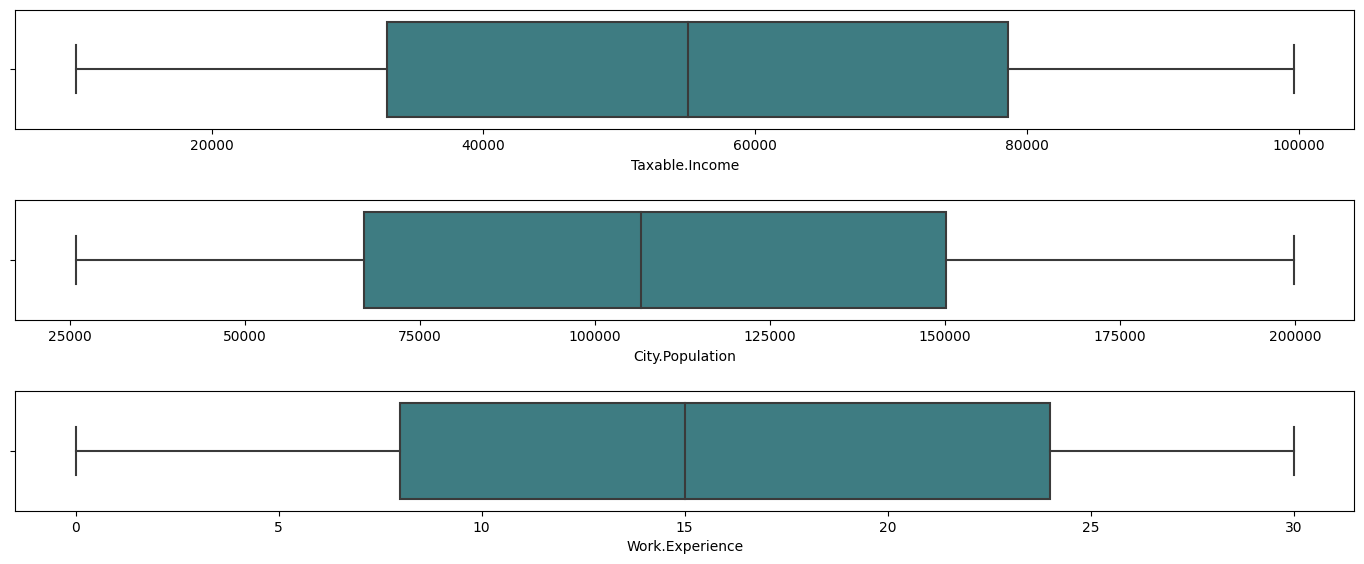

In [18]:
ot=df.copy()
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

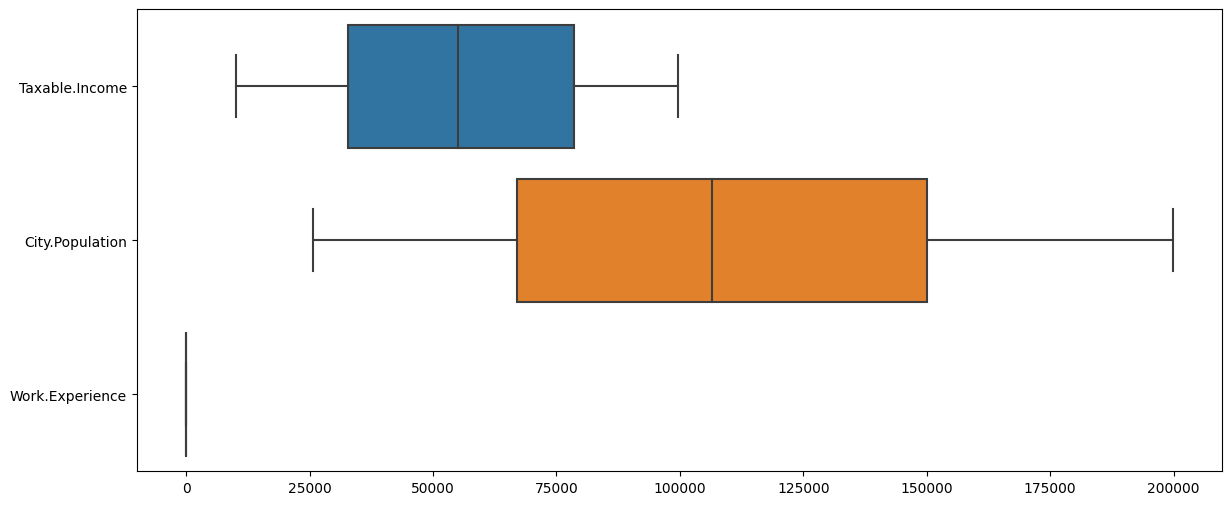

In [19]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h");

CORRELATION ANALYSIS
---

<Figure size 800x800 with 0 Axes>

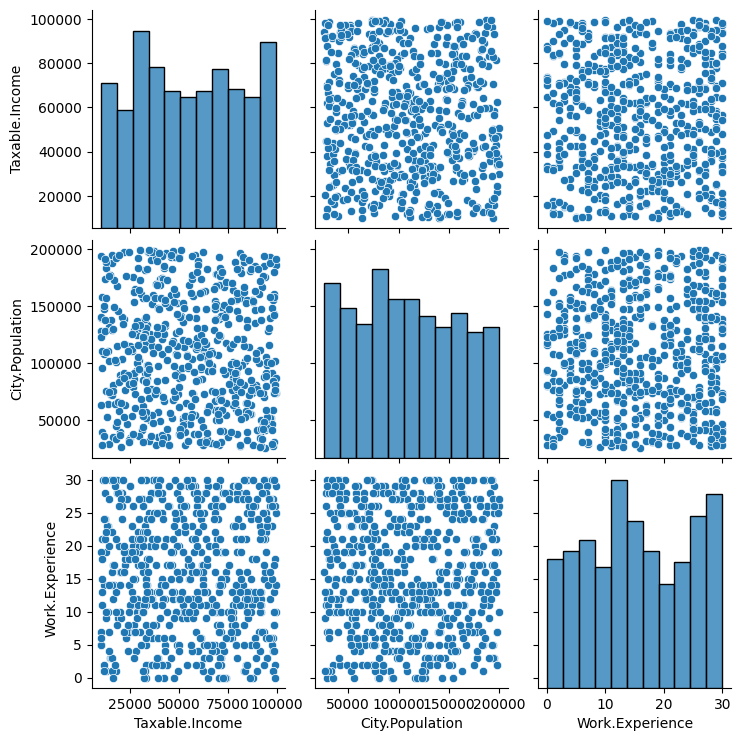

In [20]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<Axes: >

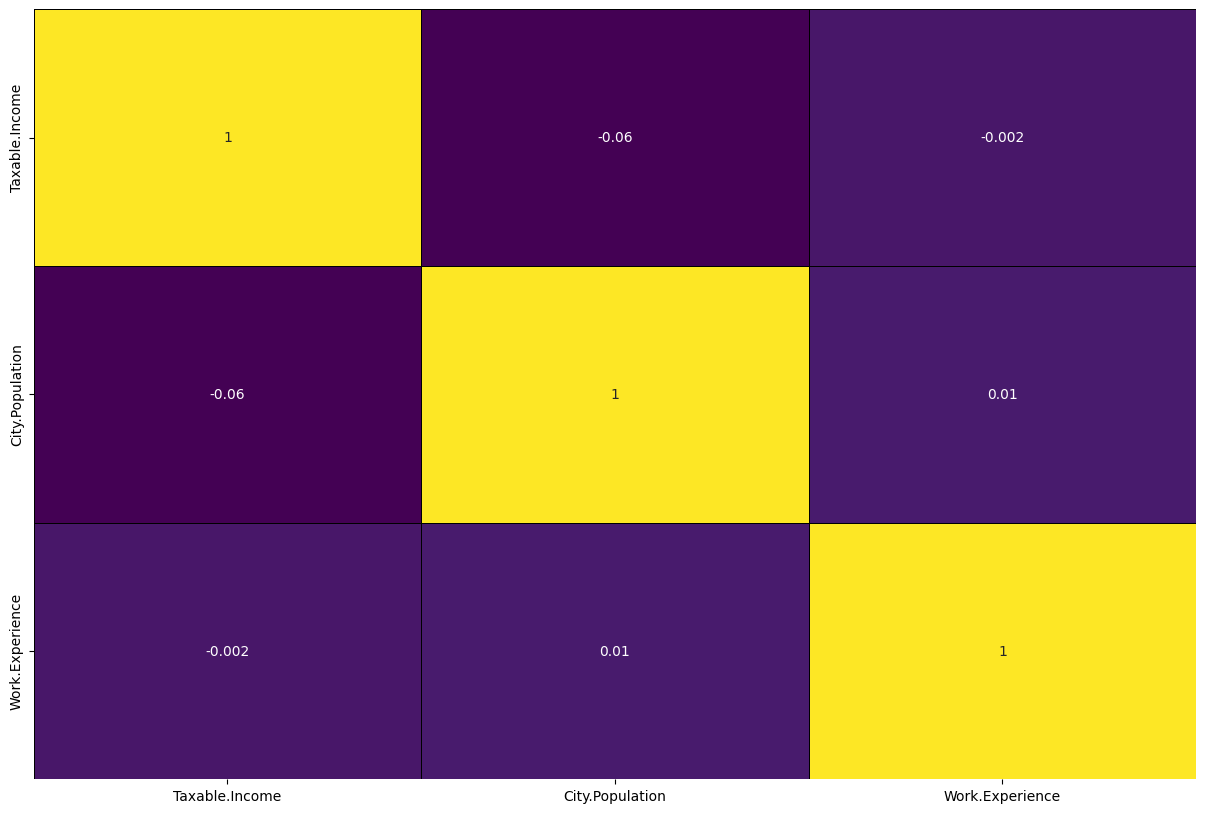

In [21]:
#correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

categorical_features
-----

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


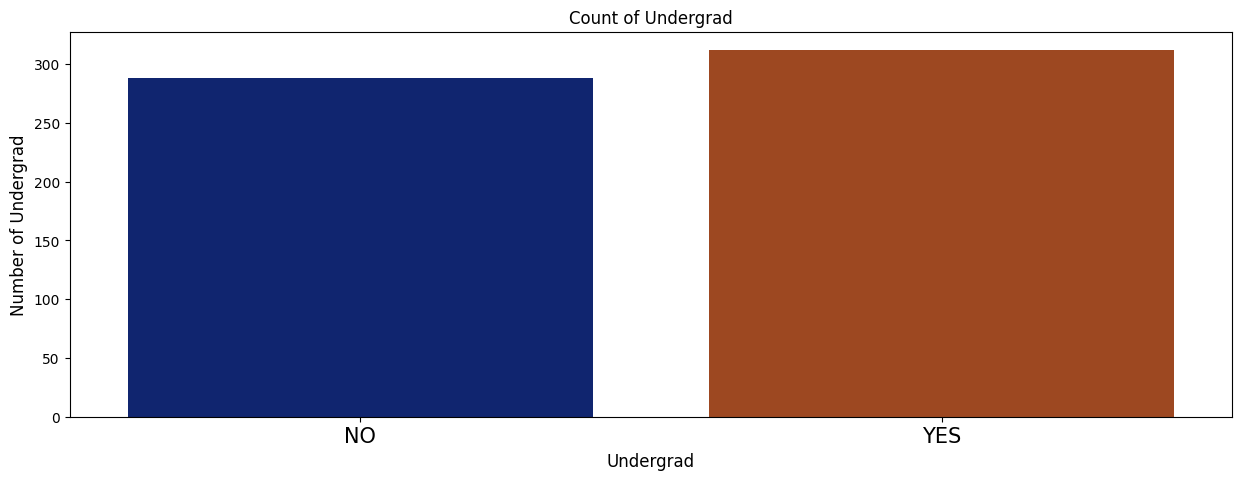

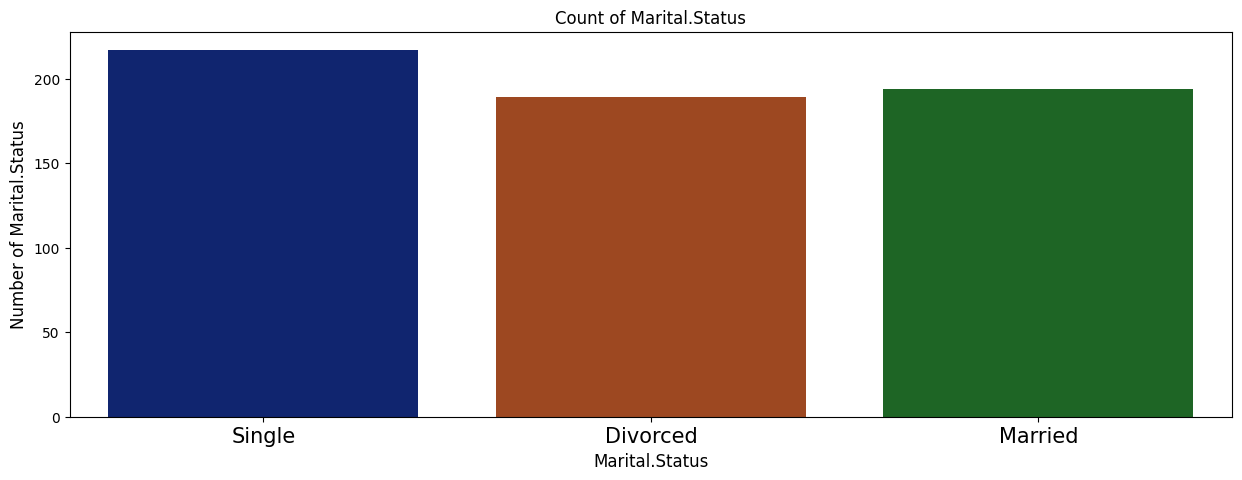

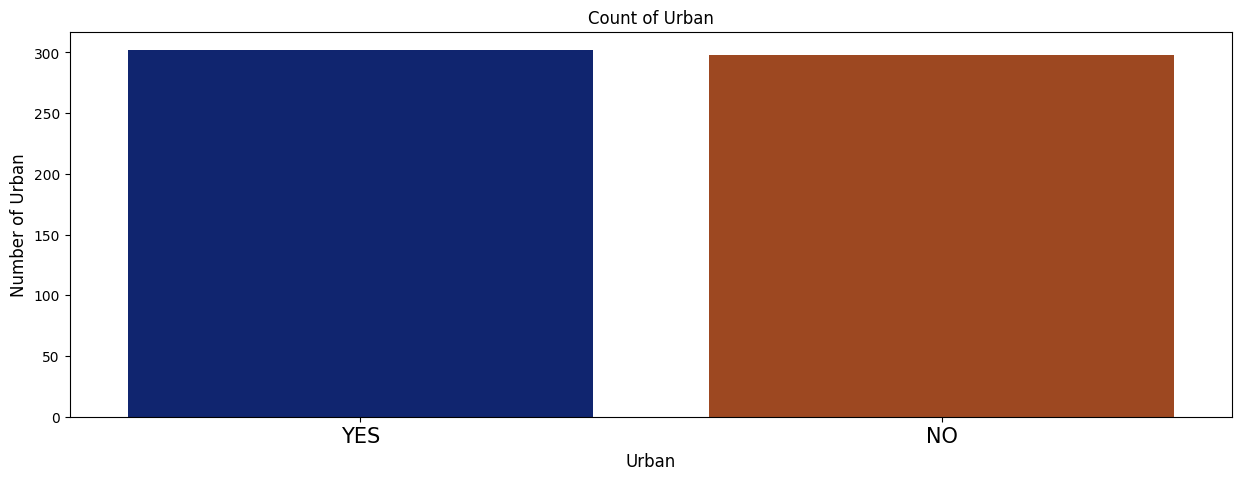

In [22]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df[column].value_counts(ascending=True);

    #plt.subplot(1, len(categorical_features), idx+1)
    plt.title("Count of "+ column)
    sns.countplot(data=df, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

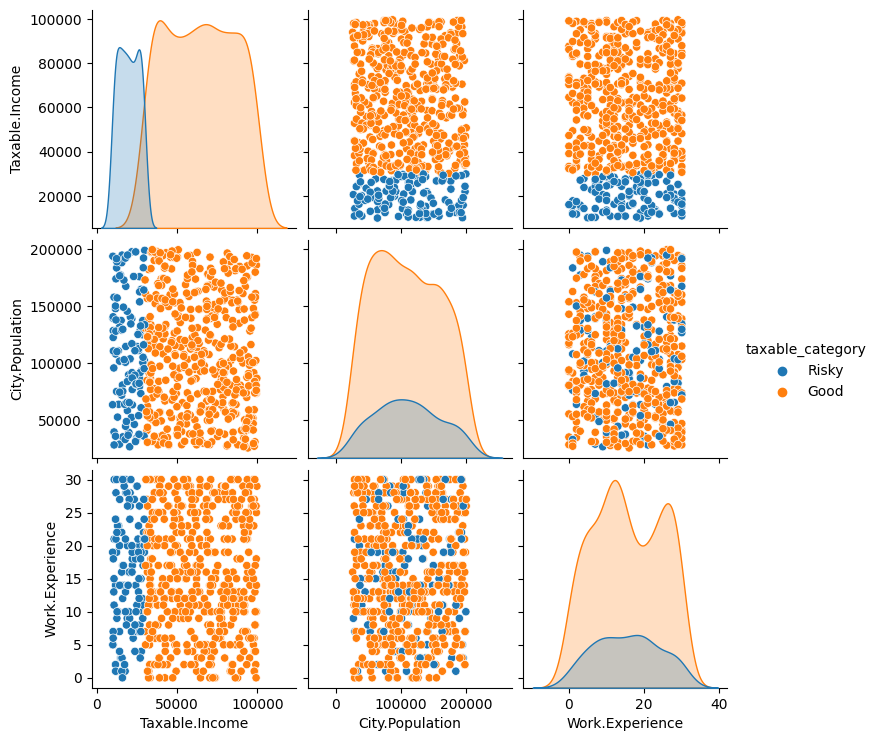

In [23]:
#visualise pair plot
sns.pairplot(data=df1, hue = 'taxable_category')

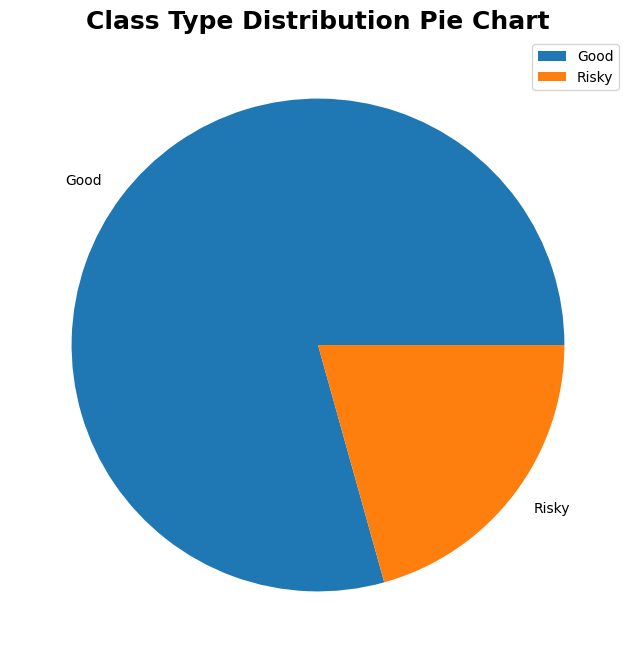

In [28]:
plt.figure(figsize = (12,8))
plt.pie(df1['taxable_category'].value_counts(),
       labels=df1.taxable_category.unique())
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [30]:
df1.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

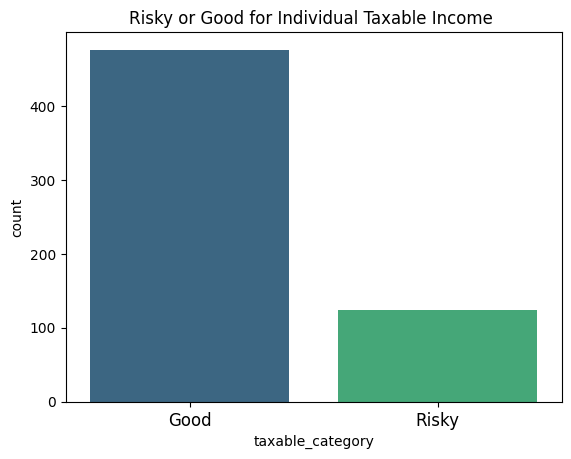

In [31]:
sns.countplot(x='taxable_category', data=df1, palette = 'viridis',
              order=df1['taxable_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

# Data Pre-Processing

In [32]:
data = df1.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [33]:
#Creating dummy vairables of the categorical features
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [34]:
data.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

In [35]:
x = data.drop('taxable_category',axis=1)
y = data['taxable_category']

In [57]:
x.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
      dtype='object')

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: int64

In [38]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [42]:
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=333, 1=87, Test: 0=143, 1=37


In [43]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


# Building Decision Tree Classifier using Entropy Criteria

In [44]:
#max dept 3 to 5
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
#training
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

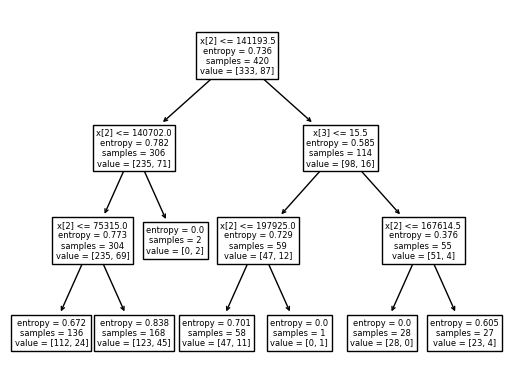

In [45]:
#PLot the decision tree
tree.plot_tree(model)
plt.show()

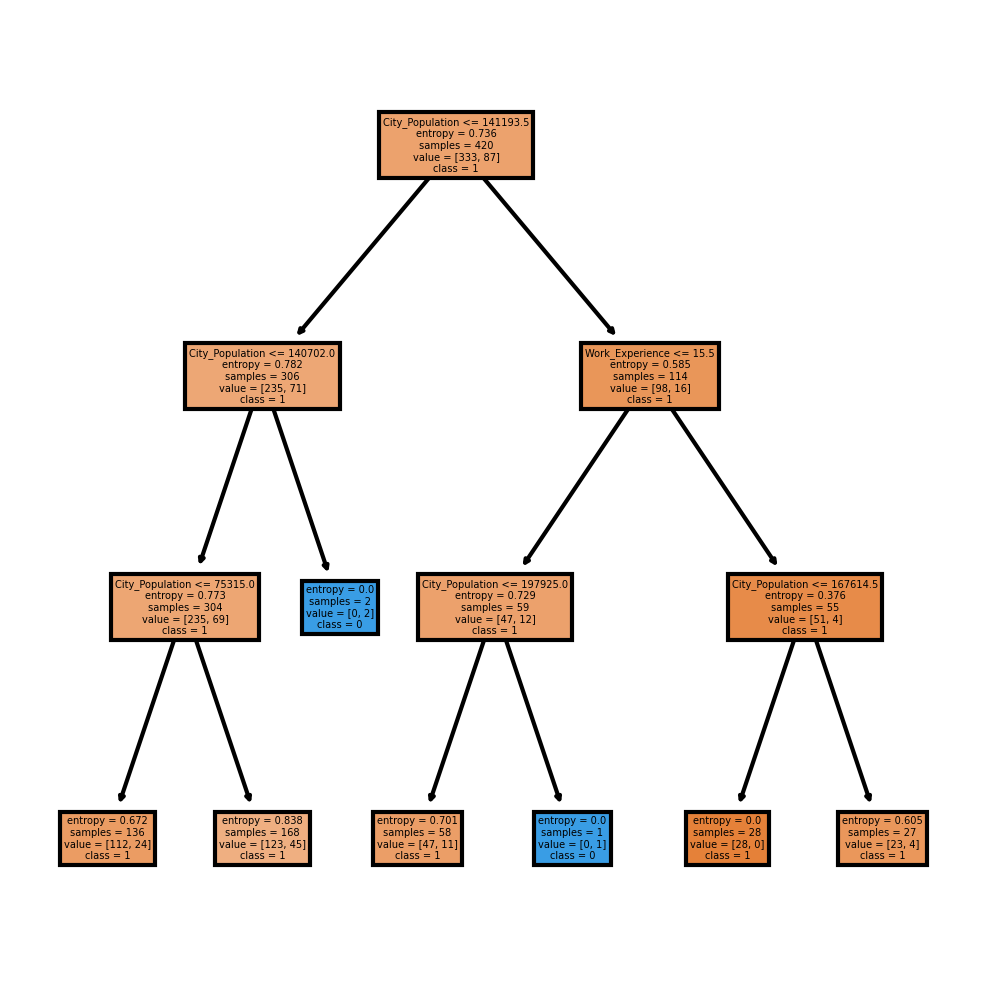

In [59]:
#predicting class

fn=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [47]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    178
1      2
dtype: int64

In [48]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [49]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
taxable_category,,
0,142,1
1,36,1


In [50]:
#CONFUSION MATRIX - on TEST SET
y_pred=model.predict(x_test)

#Building matrix
confusion_matrix_test = confusion_matrix(y_test,y_pred)
confusion_matrix_test

array([[142,   1],
       [ 36,   1]])

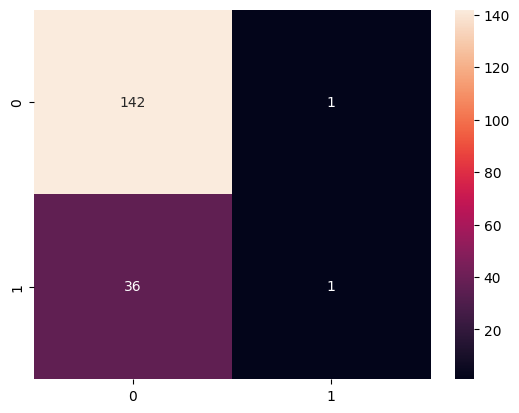

In [51]:
# visualize confusion matrix with seaborn heatmap
sns.heatmap(confusion_matrix(y_test,preds), annot=True,  fmt='.0f')
plt.show()

# Building Decision Tree Classifier (CART) using Gini Criteria

In [52]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

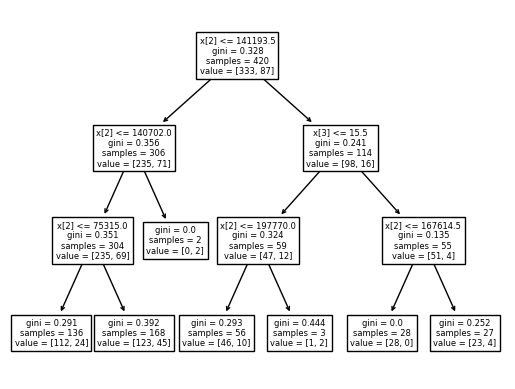

In [53]:
#PLot the decision tree
tree.plot_tree(model_gini)
plt.show()

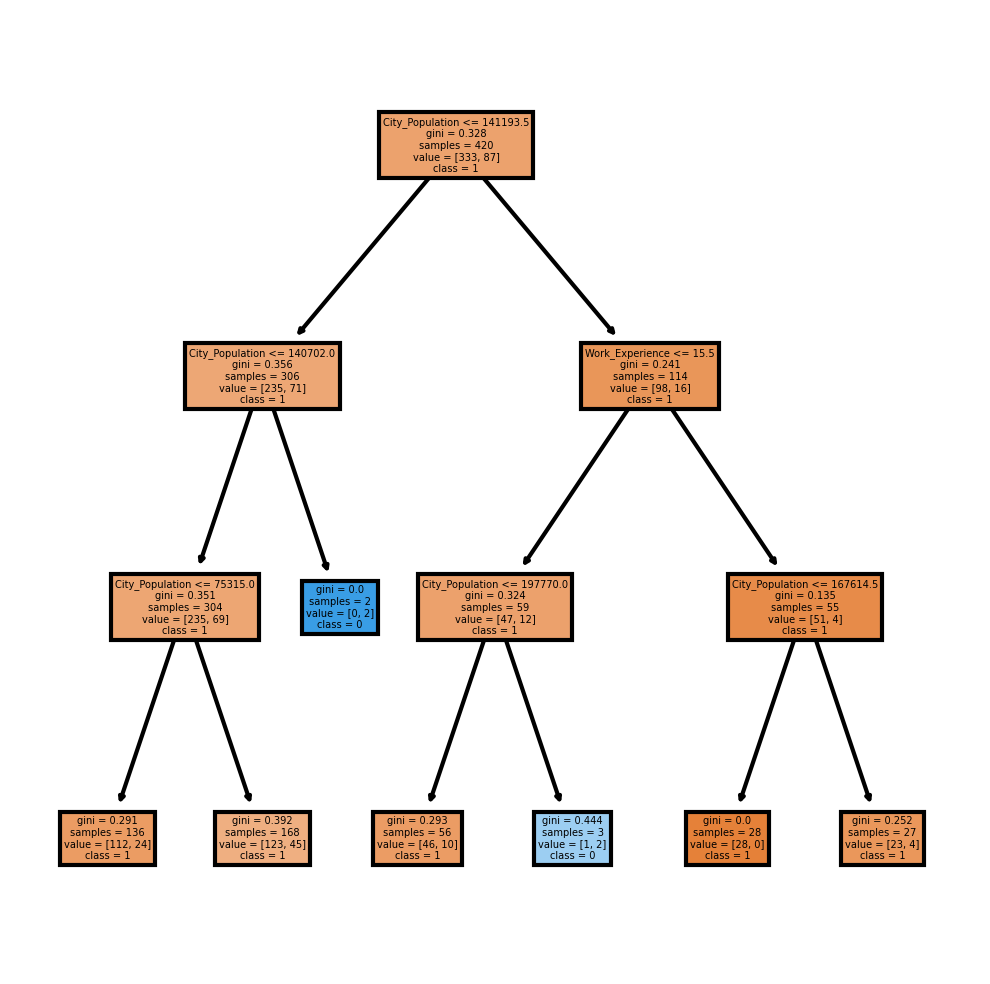

In [60]:
#predicting class

fn=['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True)
plt.show()

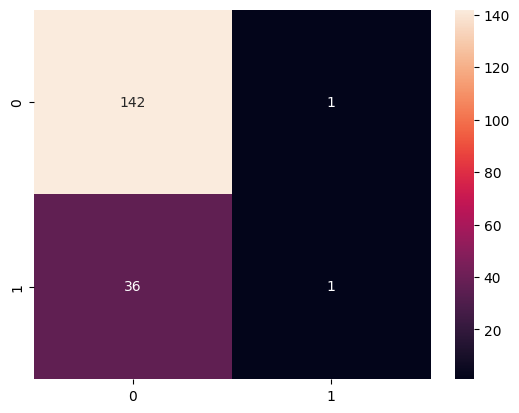

In [55]:
# visualize confusion matrix with seaborn heatmap
sns.heatmap(confusion_matrix(y_test,model_gini.predict(x_test)), annot=True,  fmt='.0f')
plt.show()